<a href="https://colab.research.google.com/github/AnanyaSDhar/Handwritten-Digits-Recognition/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten digit classifier**

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Importing dataset


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train.shape

(60000, 28, 28)

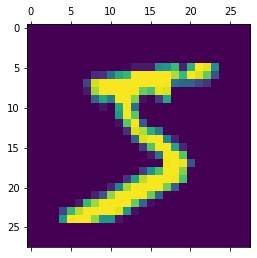

In [7]:
plt.matshow(x_train[0])

Flattening the 2D array

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

Building the model


In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4673 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9250


In [11]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2669 - accuracy: 0.9255


[0.2669130265712738, 0.9254999756813049]

In [12]:
y_predicted = model.predict(x_test_flattened)
y_predicted

313/313 [==============================] - 0s 1ms/step


array([[1.5043194e-02, 2.8581235e-07, 3.3132914e-02, ..., 9.9977595e-01,
        8.1630759e-02, 6.2514991e-01],
       [3.6778289e-01, 7.0470292e-03, 9.9923563e-01, ..., 1.5085856e-12,
        1.8123625e-01, 3.3848191e-09],
       [3.5629643e-04, 9.9473572e-01, 6.7259425e-01, ..., 1.6286616e-01,
        4.4707105e-01, 4.2988852e-02],
       ...,
       [2.6745470e-06, 4.1244771e-06, 9.1843779e-04, ..., 2.2283114e-01,
        5.1794559e-01, 7.2523344e-01],
       [1.4021755e-04, 2.2460645e-04, 1.5456576e-04, ..., 4.7662190e-05,
        7.2452801e-01, 1.3326743e-04],
       [6.4935992e-03, 4.2438847e-10, 1.7460778e-01, ..., 1.9583153e-08,
        1.4516563e-04, 6.4504798e-07]], dtype=float32)

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm



<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    0,    2,    0,    5,   11,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   7,   10,  907,   23,    9,    4,   13,   10,   46,    3],
       [   1,    0,   15,  933,    1,   19,    3,    9,   21,    8],
       [   1,    1,    4,    2,  915,    0,   10,    3,   10,   36],
       [   8,    3,    2,   40,    8,  772,   17,    7,   29,    6],
       [   8,    3,    2,    2,    8,   11,  920,    2,    2,    0],
       [   1,    6,   20,   10,    8,    0,    0,  949,    3,   31],
       [   4,   10,    5,   27,    9,   24,    9,   12,  868,    6],
       [  11,    7,    1,   13,   25,    5,    0,   22,    5,  920]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

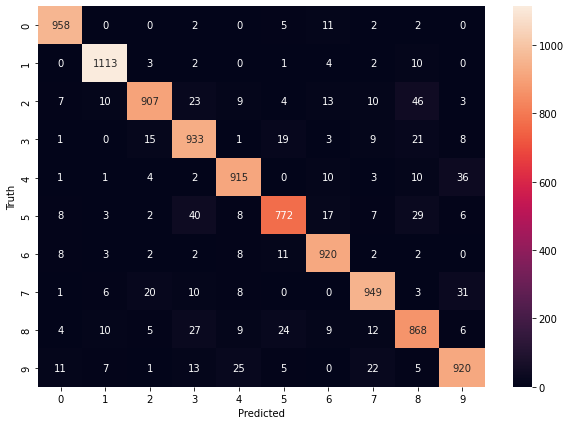

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Adding Hidden Layer


In [19]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2770 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1207 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0839 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9839


In [20]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9761


[0.07837426662445068, 0.9761000275611877]

In [23]:
y_predicted = model.predict(x_test_flattened)
y_predicted

313/313 [==============================] - 1s 2ms/step


array([[6.26799604e-03, 3.00394092e-02, 6.93893611e-01, ...,
        9.99997616e-01, 1.74614787e-02, 3.17195833e-01],
       [1.88670971e-03, 9.89757359e-01, 9.99999762e-01, ...,
        1.59401097e-07, 2.04911113e-01, 2.30986961e-06],
       [1.27751264e-04, 9.99512196e-01, 2.83535235e-02, ...,
        1.22788094e-01, 1.43727839e-01, 5.41098241e-04],
       ...,
       [2.13015155e-05, 1.14558730e-04, 6.66498890e-05, ...,
        3.01991880e-01, 2.03800932e-01, 5.19106328e-01],
       [1.92588046e-02, 8.93569028e-04, 4.04771767e-04, ...,
        1.33056454e-02, 9.88607645e-01, 2.75474986e-06],
       [3.59025076e-02, 1.18244918e-06, 8.86177644e-02, ...,
        5.22255050e-06, 9.82675629e-05, 8.18666145e-02]], dtype=float32)

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    0,    2,    1,    0,    3,    3,    1,    1],
       [   0, 1127,    2,    1,    0,    1,    2,    0,    2,    0],
       [   4,    4, 1009,    1,    2,    0,    2,    6,    3,    1],
       [   0,    0,    7,  988,    0,    5,    0,    3,    2,    5],
       [   0,    1,    2,    1,  964,    1,    7,    1,    0,    5],
       [   3,    1,    0,   12,    1,  860,    4,    2,    5,    4],
       [   6,    3,    2,    1,    4,    3,  938,    0,    1,    0],
       [   0,    7,    9,    2,    2,    0,    0, 1006,    1,    1],
       [   6,    1,    5,    5,    5,    5,    4,    3,  936,    4],
       [   1,    5,    0,    9,   17,    2,    0,    8,    2,  965]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

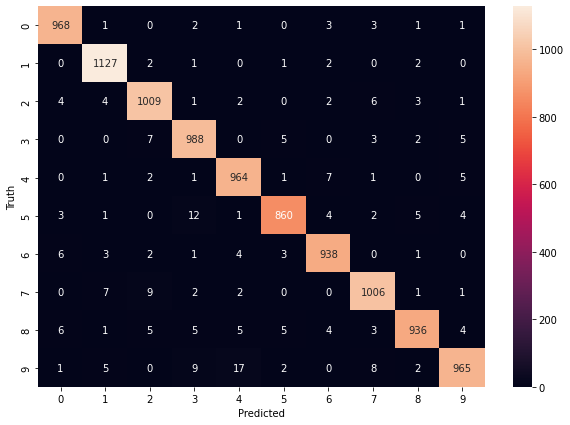

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
model = keras.Sequential([
    keras.layers.Dense(1000, input_shape=(784,),activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1838 - accuracy: 0.9444
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0798 - accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0534 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0402 - accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0324 - accuracy: 0.9894


In [42]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0681 - accuracy: 0.9811


[0.06814796477556229, 0.9811000227928162]

In [43]:
y_predicted = model.predict(x_test_flattened)
y_predicted

313/313 [==============================] - 1s 4ms/step


array([[2.1997916e-03, 1.0223361e-01, 9.8616898e-02, ..., 9.9999887e-01,
        4.3664770e-03, 3.5503528e-01],
       [3.9127831e-06, 7.4416506e-01, 1.0000000e+00, ..., 7.0852530e-04,
        1.1598294e-03, 1.2351315e-12],
       [5.2155787e-03, 9.9999249e-01, 3.0428398e-01, ..., 8.1475073e-01,
        3.8920259e-01, 1.6447807e-03],
       ...,
       [2.1599872e-05, 9.3539071e-04, 9.5965688e-06, ..., 5.4471606e-01,
        1.9969822e-01, 9.9484348e-01],
       [3.4701978e-04, 3.8524675e-05, 6.9869573e-05, ..., 2.0054903e-02,
        9.9453723e-01, 5.7843882e-01],
       [1.4677148e-01, 1.3981981e-04, 7.4356369e-04, ..., 1.4981862e-06,
        9.0026453e-02, 7.4588515e-02]], dtype=float32)

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    1,    0,    0,    1,    0,    2,    1],
       [   0, 1119,    4,    0,    0,    0,    3,    0,    9,    0],
       [   3,    0, 1013,    4,    0,    0,    2,    5,    4,    1],
       [   0,    0,    6,  986,    0,    7,    0,    1,    4,    6],
       [   2,    0,    4,    0,  953,    0,    5,    3,    0,   15],
       [   3,    0,    0,   12,    1,  858,    3,    1,   12,    2],
       [   2,    1,    0,    1,    1,    1,  950,    0,    2,    0],
       [   2,    2,    8,    0,    2,    0,    0, 1001,    2,   11],
       [   2,    0,    1,    3,    0,    2,    3,    3,  955,    5],
       [   3,    2,    0,    4,    3,    3,    2,    4,    0,  988]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

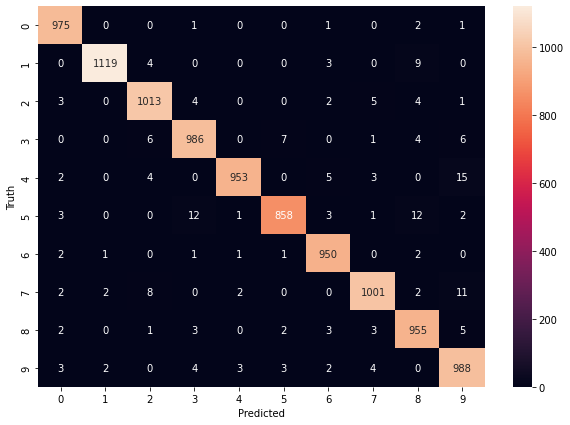

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Alternative way for using 2D matrix [keras fallenting feature]

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1212 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0851 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9838
